# Data Augmentation
###### When you create new data based on modifications fo your existing data. When working with images, the transformations
###### are the following: 
       .- Flipping an image either horizontally or vertically
       .- Rotating the image
       .- Zooming in or out the image
       .- Cropping the image
       .- Varying the color in the image
       

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

C:\Users\eherd\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)


In [7]:
image_path = "cats-and-dogs/train/dog/dog.4073.jpg"

###### Obtain image
expand_dims makes the image compatible to use it with gen.flow()

C:\Users\eherd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


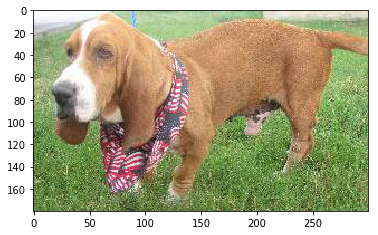

In [8]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

###### Generate batches of  augmented images from this image

In [9]:
aug_iter = gen.flow(image)

###### Get 10 samples of augmented images

In [10]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

###### Plot augmented images

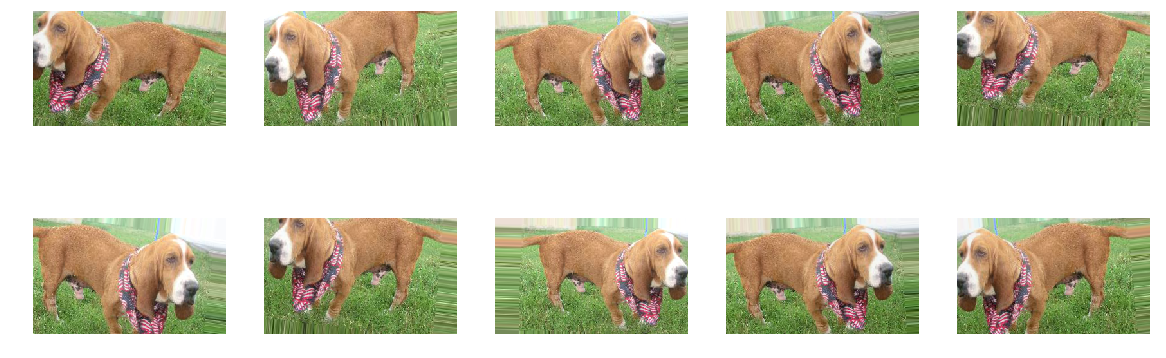

In [11]:
plots(aug_images, figsize=(20,7),rows=2)